In [1]:
! pip install matplotlib

     |████████████████████████████████| 11.5 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 9.1 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [2]:
! pip install seaborn

     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import pie, axis, show

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv("client.csv")
print(dataset.shape)

(5369, 3)


In [4]:
# print shape of the dataset with rows and columns
dataset.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [6]:
# here "client_id" is not useful so, I am going to delete this column

del dataset['client_id']

In [7]:
dataset.head()

,birth_number,district_id
0,706213,18
1,450204,1
2,406009,1
3,561201,5
4,605703,5


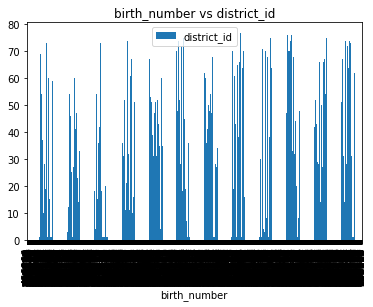

In [8]:
dataset.plot.bar(x="birth_number", y="district_id", title="birth_number vs district_id")
plt.show(block=True)

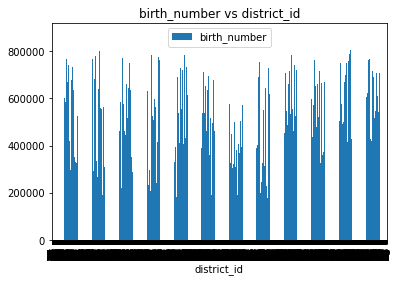

In [9]:
dataset.plot.bar(x="district_id", y="birth_number", title="birth_number vs district_id")
plt.show(block=True)

<AxesSubplot:ylabel='Frequency'>

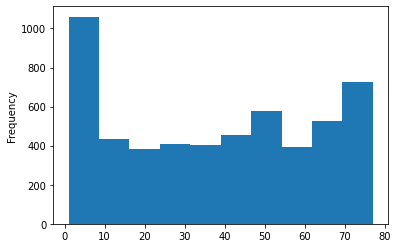

In [13]:
dataset["district_id"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

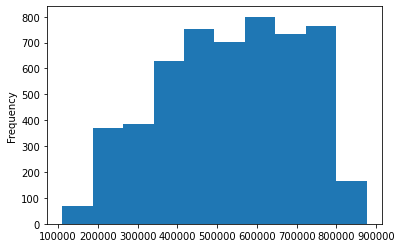

In [14]:
dataset["birth_number"].plot.hist()

In [19]:
! pip install scikit-learn

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


In [20]:
from sklearn.cluster import KMeans

In [22]:
x = dataset.iloc[:, [0,1]].values

In [23]:
# implement k-means again using k=5
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 3 3 ... 4 4 0]


array([[5.15238860e+05, 3.85463636e+01],
       [7.55610294e+05, 3.68362903e+01],
       [2.49339023e+05, 3.71790040e+01],
       [3.99175889e+05, 3.73057041e+01],
       [6.32455775e+05, 3.67345361e+01]])

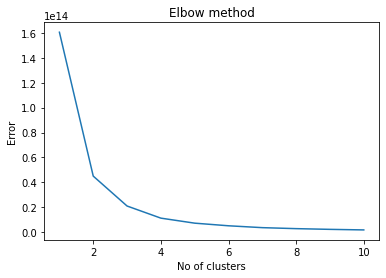

In [24]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

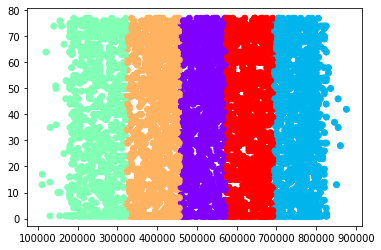

In [30]:
plt.scatter(x[:, 0],x[:,1], c=y_kmeans5, cmap='rainbow')